<a href="https://colab.research.google.com/github/FiyinfobaO/Hamoye/blob/master/Stage_E_QUIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# copy the data from drive to current directory
!cp '/content/drive/My Drive/household_power_consumption.txt' '/content/'

In [3]:
# reading the .txt file while merging the date and time columns into 1 and converting it to a datetime object
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]})
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
# set the datetime column as index
df.set_index('datetime', inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [6]:
# checking the no of null values
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
# checking for null values that may not have been catured by the isnull function
null_num = 0
for values in df.values.tolist():
    for value in values:
        if value == '?':
            null_num += 1
        else:
            continue

print('Total no of null values are: ', null_num)

Total no of null values are:  155874


In [8]:
# replacing ? with nan
df.replace('?', np.nan, inplace=True) 

In [9]:
# rechecking the number of null values 
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df.select_dtypes(include=['object']).columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')

In [11]:
#using a loop to change the object datatype columns to float
for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].astype('float')

In [12]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [13]:
# filling the null values for each column with the mean of each respective column
df = df.fillna({'Global_active_power':df['Global_active_power'].mean(), 'Global_reactive_power':df['Global_reactive_power'].mean(),
           'Voltage':df['Voltage'].mean(), 'Global_intensity':df['Global_intensity'].mean(),
           'Sub_metering_1':df['Sub_metering_1'].mean(), 'Sub_metering_2':df['Sub_metering_2'].mean(),
           'Sub_metering_3':df['Sub_metering_3'].mean()})

In [14]:
# create a copy of the data
new_df = df.copy()

In [15]:
# checking no of missing values
new_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

##Using the 'Global_active_power' column

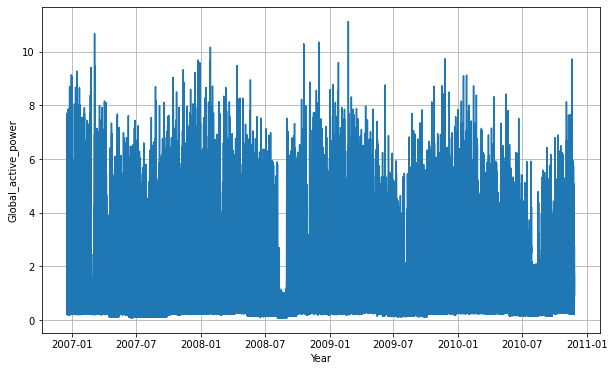

In [16]:
# plot to visualize the series using 'Global_active_power' column
plt.figure(figsize=(10,6))
plt.plot(new_df.index, new_df['Global_active_power'], '-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

###Downsampling the data to daily timeframe

In [17]:
# downsampling to daily basis
new_df_daily = new_df.resample('D').sum()

In [18]:
new_df_daily.isnull().values.sum()

0

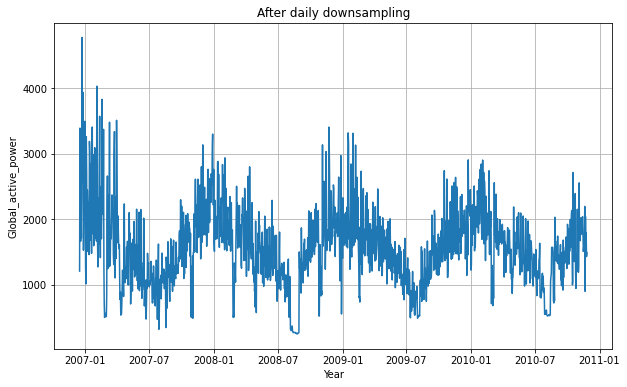

In [19]:
# plot after daily downsampling of 'Global_active_power' over time
plt.figure(figsize=(10,6))
plt.plot(new_df_daily.index, new_df_daily['Global_active_power'], '-')
plt.grid()
plt.title('After daily downsampling')
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

In [30]:
# finding the no of observations/rows
print('no of observations after daily downsampling is {}'.format(len(new_df_daily)))

no of observations after daily downsampling is 1442


In [20]:
# USING THE DOWNSAMPLED DAILY DATA
# assigning columns to variables
gap = new_df_daily['Global_active_power']
grp = new_df_daily['Global_reactive_power']

In [21]:
from scipy.stats import pearsonr
# to calculate Pearson's correlation
corr, _ = pearsonr(gap, grp)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.04


In [22]:
# another way to find pearson correlation coefficient
round(gap.corr(grp), 2)

0.04

In [23]:
# USING THE ORIGINAL DATA
ga = new_df['Global_active_power']
gr = new_df['Global_reactive_power']

In [24]:
# to calculate Pearson's correlation
corr, _ = pearsonr(ga, gr)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.25


In [25]:
round(ga.corr(gr), 2)

0.25

In [26]:
# USING THE DOWNSAMPLED DAILY DATA
# assigning columns to variables
vo = new_df_daily['Voltage']
inten = new_df_daily['Global_intensity']

In [27]:
# to calculate Pearson's correlation
corr, _ = pearsonr(vo, inten)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.05


In [28]:
# USING THE ORIGINAL DATA
v = df['Voltage']
inte = df['Global_intensity']

In [29]:
corr, _ = pearsonr(v, inte)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41


##DECOMPOSITION PLOT

###For the daily downsampled dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


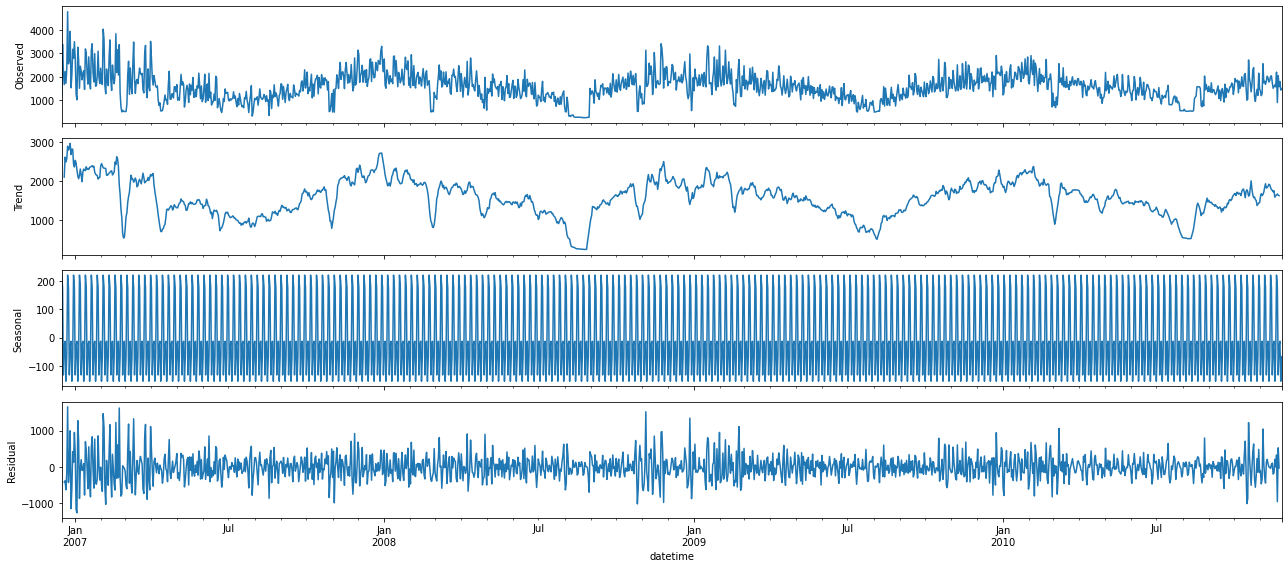

In [31]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
dp_daily = sm.tsa.seasonal_decompose(new_df_daily['Global_active_power'], model='additive')
dp_daily.plot()
plt.show()

####Looks like this doesn't have any trend but the seasonality is hard to tell. It may be because the datapoints are too much so it makes it harder to visualize.

##Our next task will be to make the series stationary.
##We will check for non-stationarity using the ADF Test



###For the daily downsampled dataset

In [32]:
# ADF TEST
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(new_df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print(f'Critical_values:')
for k, v in adf_result[4].items():
  print(f'  {k} : {v}')

ADF Statistic: -3.7317038452674414
p_value: 0.003688677846598547
No. of lags used: 22
No. of observations used: 1419
Critical_values:
  1% : -3.434966750462565
  5% : -2.8635789736973725
  10% : -2.5678555388041384


###since the ADF Statistic value for the daily is far less than all critical values(1,5&10%), it is **stationary**

#Modelling using Facebook prophet for Univariate Time Series

###Working with the daily downsampled dataset

In [33]:
new_df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [34]:
# resetting the index
res_new_df_daily = new_df_daily.reset_index()
res_new_df_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [35]:
# taking just the columns we need
res_new_df_daily = res_new_df_daily[['datetime', 'Global_active_power']]

# renaming the column
res_new_df_daily = res_new_df_daily.rename(columns={'datetime':'ds', 'Global_active_power':'y'})
print(res_new_df_daily.shape)
res_new_df_daily.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [36]:
res_new_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1442 non-null   datetime64[ns]
 1   y       1442 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.7 KB


In [37]:
# taking the last 365 days as our test data
test = res_new_df_daily[-365:]
print(test.shape)
test.head()

(365, 2)


,ds,y
1077,2009-11-27,1380.026
1078,2009-11-28,1858.950
1079,2009-11-29,1650.962
1080,2009-11-30,1745.190
1081,2009-12-01,1756.378


In [38]:
# taking the remaining values to be used for the training data
train = res_new_df_daily[:-365]
print(train.shape)
train.head()

(1077, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [40]:
# confirming the length of the train data equals the length of the overall data minus 365 days
assert len(train) == (len(new_df_daily)-365)

In [41]:
from fbprophet import Prophet
# creating the model and fitting it to the dailly downsampled data
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
# predicting for the next 365 days
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1651.870476,1887.104948,2973.575573,1651.870476,1651.870476,775.803954,775.803954,775.803954,245.727868,245.727868,245.727868,530.076086,530.076086,530.076086,0.0,0.0,0.0,2427.674430
1,2006-12-17,1651.695654,1884.560807,3008.347302,1651.695654,1651.695654,772.611682,772.611682,772.611682,228.437514,228.437514,228.437514,544.174167,544.174167,544.174167,0.0,0.0,0.0,2424.307336
2,2006-12-18,1651.520833,1484.775551,2632.819110,1651.520833,1651.520833,397.879289,397.879289,397.879289,-161.218418,-161.218418,-161.218418,559.097707,559.097707,559.097707,0.0,0.0,0.0,2049.400122
3,2006-12-19,1651.346012,1630.611271,2778.776431,1651.346012,1651.346012,545.082036,545.082036,545.082036,-29.322660,-29.322660,-29.322660,574.404696,574.404696,574.404696,0.0,0.0,0.0,2196.428047
4,2006-12-20,1651.171190,1649.647694,2757.802499,1651.171190,1651.171190,564.928312,564.928312,564.928312,-24.708936,-24.708936,-24.708936,589.637248,589.637248,589.637248,0.0,0.0,0.0,2216.099502


In [43]:
# viewing specific columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2427.674430,1887.104948,2973.575573,1651.870476,1651.870476,1651.870476
1,2006-12-17,2424.307336,1884.560807,3008.347302,1651.695654,1651.695654,1651.695654
2,2006-12-18,2049.400122,1484.775551,2632.819110,1651.520833,1651.520833,1651.520833
3,2006-12-19,2196.428047,1630.611271,2778.776431,1651.346012,1651.346012,1651.346012
4,2006-12-20,2216.099502,1649.647694,2757.802499,1651.171190,1651.171190,1651.171190
...,...,...,...,...,...,...,...
1437,2010-11-22,2040.151795,1468.922204,2596.200475,1632.211137,1619.956102,1645.162535
1438,2010-11-23,2182.312497,1644.475869,2759.255853,1632.346982,1620.061587,1645.349430
1439,2010-11-24,2193.411479,1630.326821,2786.688229,1632.482827,1620.181807,1645.536326
1440,2010-11-25,2026.197054,1454.157691,2539.725727,1632.618672,1620.249803,1645.723221


In [44]:
# created mape metric function
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [45]:
test_val = test['y'] # true y values
pred_val = forecast['yhat'][-365:] # predicted y values

In [46]:
# mape metric test on univariate data
prediction = mape(test_val, pred_val)
print('MAPE prediction: ', round(prediction, 2)) # rounds prediction to 2dp

MAPE prediction:  20.9


In [47]:
from sklearn.metrics import mean_squared_error
# gets the mse metric
pred_mse = mean_squared_error(test_val, pred_val)
# takes the sqrt of the mse to get the rmse
pred_rmse = np.sqrt(pred_mse)
print('RMSE prediction: ', round(pred_rmse, 2)) # rounds prediction to 2dp

RMSE prediction:  375.04


In [48]:
# rmse metric function
def rmse(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [49]:
# using the custom rmse metric function
new_pred_rmse = rmse(test_val, pred_val)
round(new_pred_rmse, 2) 

375.04

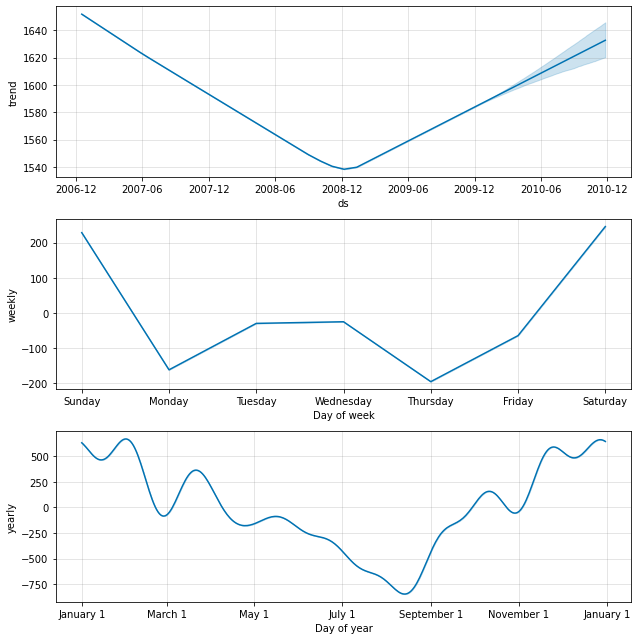

In [50]:
# plotting the components
model.plot_components(forecast)
plt.show()

###As seen from the component plot above, August has the least yearly seasonality value

#Modelling using Facebook prophet for Multivariate Time Series

In [51]:
# resetting the index
res_new_df_daily2 = new_df_daily.reset_index()
res_new_df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [52]:
# renaming the columns
res_new_df_daily2 = res_new_df_daily2.rename(columns={'datetime':'ds', 'Global_active_power':'y', 'Global_reactive_power':'add1', 'Voltage':'add2', 'Global_intensity':'add3', 'Sub_metering_1':'add4', 'Sub_metering_2':'add5', 'Sub_metering_3':'add6'})
print(res_new_df_daily2.shape)
res_new_df_daily2.head()

(1442, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [53]:
res_new_df_daily2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1442 non-null   datetime64[ns]
 1   y       1442 non-null   float64       
 2   add1    1442 non-null   float64       
 3   add2    1442 non-null   float64       
 4   add3    1442 non-null   float64       
 5   add4    1442 non-null   float64       
 6   add5    1442 non-null   float64       
 7   add6    1442 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 90.2 KB


In [54]:
# taking the last 365 values to be used as test data
test2 = res_new_df_daily2[-365:]
print(test2.shape)
test2.head()

(365, 8)


,ds,y,add1,add2,add3,add4,add5,add6
1077,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0
1078,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0
1079,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0
1080,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0
1081,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0


In [55]:
# taking the remaining values to be used for the training data
train2 = res_new_df_daily2[:-365]
print(train2.shape)
train2.head()

(1077, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [56]:
# confirming the length of the train data equals the length of the overall data minus 365 days
assert len(train2) == (len(new_df_daily)-365)

In [57]:
# creating the model 
model2 = Prophet()

In [58]:
# adding reressor for all the independent variables
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
# fit the model to train data
model2.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
# predicting for the next 365 days
future2 = model2.make_future_dataframe(periods=365, freq='D') 
future2

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [60]:
# adding the other 6 independent variables to the future dataframe before making predictions
future2['add1'] = res_new_df_daily2['add1']
future2['add2'] = res_new_df_daily2['add2']
future2['add3'] = res_new_df_daily2['add3']
future2['add4'] = res_new_df_daily2['add4']
future2['add5'] = res_new_df_daily2['add5']
future2['add6'] = res_new_df_daily2['add6']

In [61]:
# making predictions
forecast2 = model2.predict(future2) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1566.208205,1158.954578,1190.193394,1566.208205,1566.208205,25.033001,25.033001,25.033001,-72.763302,-72.763302,-72.763302,-356.972861,-356.972861,-356.972861,2.196835,2.196835,2.196835,0.742868,0.742868,0.742868,-5.557483,-5.557483,-5.557483,-391.553789,-391.553789,-391.553789,-407.320943,-407.320943,-407.320943,1.408596,1.408596,1.408596,14.358558,14.358558,14.358558,0.0,0.0,0.0,1174.654416
1,2006-12-17,1566.143627,3401.338840,3431.745605,1566.143627,1566.143627,-9.027243,-9.027243,-9.027243,-0.120897,-0.120897,-0.120897,1839.073287,1839.073287,1839.073287,-0.484864,-0.484864,-0.484864,-1.170809,-1.170809,-1.170809,6.319667,6.319667,6.319667,1849.806679,1849.806679,1849.806679,1834.589141,1834.589141,1834.589141,0.164156,0.164156,0.164156,15.053382,15.053382,15.053382,0.0,0.0,0.0,3415.950306
2,2006-12-18,1566.079050,2188.257019,2218.960355,1566.079050,1566.079050,2.418741,2.418741,2.418741,0.353928,0.353928,0.353928,611.805162,611.805162,611.805162,0.794648,0.794648,0.794648,-0.347734,-0.347734,-0.347734,7.275203,7.275203,7.275203,637.648383,637.648383,637.648383,622.299948,622.299948,622.299948,-0.338153,-0.338153,-0.338153,15.686588,15.686588,15.686588,0.0,0.0,0.0,2203.727433
3,2006-12-19,1566.014473,1663.558580,1694.316439,1566.014473,1566.014473,4.352727,4.352727,4.352727,0.672347,0.672347,0.672347,98.827383,98.827383,98.827383,1.090123,1.090123,1.090123,-2.965703,-2.965703,-2.965703,-3.763561,-3.763561,-3.763561,112.790843,112.790843,112.790843,98.213317,98.213317,98.213317,-1.669783,-1.669783,-1.669783,16.247309,16.247309,16.247309,0.0,0.0,0.0,1678.805316
4,2006-12-20,1565.949895,2207.243378,2240.184313,1565.949895,1565.949895,2.560270,2.560270,2.560270,0.800421,0.800421,0.800421,627.481336,627.481336,627.481336,2.196835,2.196835,2.196835,-0.361925,-0.361925,-0.361925,7.338717,7.338717,7.338717,657.843016,657.843016,657.843016,640.015654,640.015654,640.015654,1.101892,1.101892,1.101892,16.725469,16.725469,16.725469,0.0,0.0,0.0,2223.792911


In [62]:
# viewing specific columns
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1174.654416,1158.954578,1190.193394,1566.208205,1566.208205,1566.208205
1,2006-12-17,3415.950306,3401.338840,3431.745605,1566.143627,1566.143627,1566.143627
2,2006-12-18,2203.727433,2188.257019,2218.960355,1566.079050,1566.079050,1566.079050
3,2006-12-19,1678.805316,1663.558580,1694.316439,1566.014473,1566.014473,1566.014473
4,2006-12-20,2223.792911,2207.243378,2240.184313,1565.949895,1565.949895,1565.949895
...,...,...,...,...,...,...,...
1437,2010-11-22,2119.118426,1821.516093,2416.511276,1643.329613,1347.298215,1942.077693
1438,2010-11-23,1660.812690,1367.630639,1955.097343,1643.459900,1346.124537,1944.254886
1439,2010-11-24,1868.206808,1574.425222,2163.117208,1643.590188,1345.209499,1945.985981
1440,2010-11-25,1491.116158,1195.419113,1788.195862,1643.720475,1344.545754,1947.049302


In [63]:
test2_val = test2['y'] # true y values
pred_val2 = forecast2['yhat'][-365:] # predicted y values

In [64]:
# mape metric test on multivariate data
prediction2 = mape(test2_val, pred_val2)
print('MAPE prediction: ', round(prediction2, 2)) # rounds the mape value to 2 dp

MAPE prediction:  2.83


In [65]:
# getting the mse metric 
pred2_mse = mean_squared_error(test2_val, pred_val2)
# taking the sqrt of the mse to get the rmse
pred2_rmse = np.sqrt(pred2_mse)
print('RMSE prediction: ', round(pred2_rmse, 2))

RMSE prediction:  41.93


In [66]:
# using the custom rmse function to get the rmse 
new_pred_rmse2 = rmse(test2_val, pred_val2)
round(new_pred_rmse2, 2) 

41.93

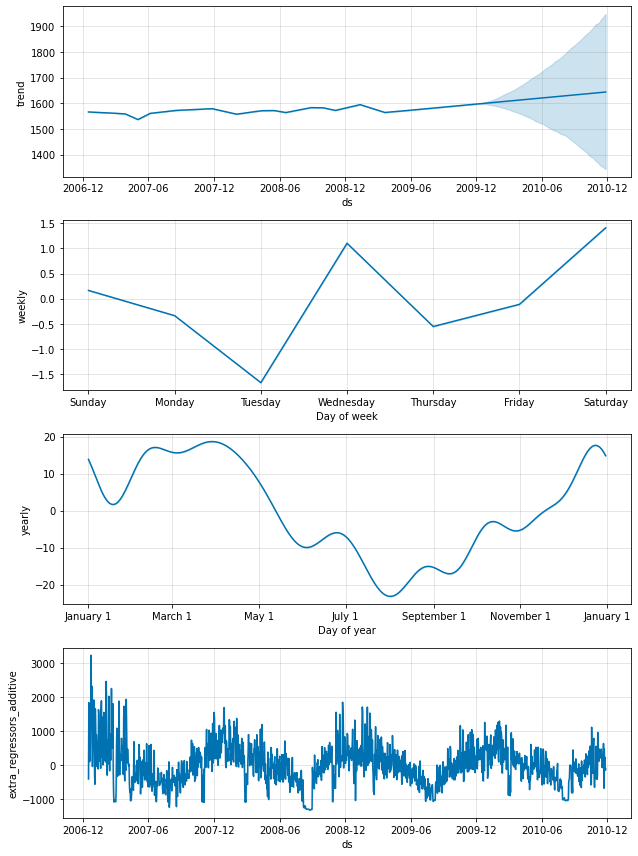

In [67]:
# plotting the components
model2.plot_components(forecast2)
plt.show()

###As seen in the component plot above, Tuesday has the least value for daily seasonality